In [108]:
# Don't change this cell; just run it. 
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import random
plt.style.use('ggplot')
import matplotlib.ticker as ticker
from PIL import Image
import urllib

In [71]:
#https://images.fotmob.com/image_resources/logo/teamlogo/130394.png
df = pd.read_html('https://fbref.com/en/players/fe81d0d1/matchlogs/2022/c22/passing_types/Nicolas-Lodeiro-Match-Logs')
df2 = pd.read_html('https://fbref.com/en/players/fe81d0d1/matchlogs/2021/c22/passing_types/Nicolas-Lodeiro-Match-Logs')
df3 = pd.read_html('https://fbref.com/en/players/fe81d0d1/matchlogs/2020/c22/passing_types/Nicolas-Lodeiro-Match-Logs')
df4 = pd.read_html('https://fbref.com/en/players/fe81d0d1/matchlogs/2019/c22/passing_types/Nicolas-Lodeiro-Match-Logs')
df5 = pd.read_html('https://fbref.com/en/players/fe81d0d1/matchlogs/2018/c22/passing_types/Nicolas-Lodeiro-Match-Logs')

In [72]:
df = pd.DataFrame(df[0])
df2 = pd.DataFrame(df2[0])
df3 = pd.DataFrame(df3[0])
df4 = pd.DataFrame(df4[0])
df5 = pd.DataFrame(df5[0])

In [73]:
col = ['Date', 'Day', 'Round', 'Venue', 'Result', 'Squad', 'Opponent', 'Start',
       'Pos', 'Min', 'Att', 'Live', 'Dead', 'FK', 'TB', 'Press', 'Sw', 'Crs',
       'CK', 'In', 'Out', 'Str', 'Ground', 'Low', 'High', 'Left', 'Right',
       'Head', 'TI', 'Other', 'Cmp', 'Off', 'Out2', 'Int', 'Blocks',
       'Match Report']
df.columns = df.columns.droplevel()
df = df.dropna()
df.columns = col
df2.columns = df2.columns.droplevel()
df2 = df2.dropna()
df2.columns = col
df3.columns = df3.columns.droplevel()
df3 = df3.dropna()
df3.columns = col
df4.columns = df4.columns.droplevel()
df4 = df4.dropna()
df4.columns = col
df5.columns = df5.columns.droplevel()
df5 = df5.dropna()
df5.columns = col

In [70]:
df4.columns = df4.columns.droplevel()
df4.columns

Index(['Date', 'Day', 'Round', 'Venue', 'Result', 'Squad', 'Opponent', 'Start',
       'Pos', 'Min', 'Att', 'Live', 'Dead', 'FK', 'TB', 'Press', 'Sw', 'Crs',
       'CK', 'In', 'Out', 'Str', 'Ground', 'Low', 'High', 'Left', 'Right',
       'Head', 'TI', 'Other', 'Cmp', 'Off', 'Out', 'Int', 'Blocks',
       'Match Report'],
      dtype='object')

In [74]:
lodeiro = pd.merge(df, df2, how='outer')
lodeiro = pd.merge(lodeiro, df3, how='outer')
lodeiro = pd.merge(lodeiro, df4, how='outer')
lodeiro = pd.merge(lodeiro, df5, how='outer')

#lodeiro["mday"] = lodeiro["Date"]
from datetime import datetime
lodeiro["Year"] = lodeiro["Date"]
for i in range(len(lodeiro)):
        lodeiro["Year"][i] = lodeiro["Date"][i][0:4]
        lodeiro["Date"][i] = datetime.strptime(lodeiro["Date"][i], '%Y-%m-%d')
        #lodeiro["mday"][i] = datetime.strptime(lodeiro["mday"][i][5:], '%m-%d')
lodeiro = lodeiro.reset_index().drop(columns=["index"])

C:\Users\matan\AppData\Local\Temp/ipykernel_46032/3356115557.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lodeiro["Year"][i] = lodeiro["Date"][i][0:4]
C:\Users\matan\AppData\Local\Temp/ipykernel_46032/3356115557.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lodeiro["Date"][i] = datetime.strptime(lodeiro["Date"][i], '%Y-%m-%d')


In [76]:
lodeiro.columns

Index(['Date', 'Day', 'Round', 'Venue', 'Result', 'Squad', 'Opponent', 'Start',
       'Pos', 'Min', 'Att', 'Live', 'Dead', 'FK', 'TB', 'Press', 'Sw', 'Crs',
       'CK', 'In', 'Out', 'Str', 'Ground', 'Low', 'High', 'Left', 'Right',
       'Head', 'TI', 'Other', 'Cmp', 'Off', 'Out2', 'Int', 'Blocks',
       'Match Report', 'Year'],
      dtype='object')

In [17]:
df = df.dropna()

In [41]:
df.columns

Index(['Date', 'Day', 'Comp', 'Round', 'Venue', 'Result', 'Squad', 'Opponent',
       'Start', 'Pos', 'Min', 'Att', 'Live', 'Dead', 'FK', 'TB', 'Press', 'Sw',
       'Crs', 'CK', 'In', 'Out2', 'Str', 'Ground', 'Low', 'High', 'Left',
       'Right', 'Head', 'TI', 'Other', 'Cmp', 'Off', 'Out2', 'Int', 'Blocks',
       'Match Report'],
      dtype='object')

In [78]:
lodeiro = lodeiro.loc[lodeiro.Round == "Regular Season"]
#lodeiro = lodeiro.loc[lodeiro["TotalAtt"]>=10]
lodeiro = lodeiro.loc[lodeiro["Min"]>70]
lodeiro = lodeiro.sort_values('Date')
lodeiro = lodeiro.reset_index().drop(columns=["index"]).reset_index()
lodeiro.describe()

,index,Min,Att,Live,Dead,FK,TB,Press,Sw,Crs,...,Left,Right,Head,TI,Other,Cmp,Off,Out2,Int,Blocks
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,...,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,47.000000,88.957895,75.347368,65.726316,9.621053,3.168421,0.473684,11.852632,3.442105,3.231579,...,61.852632,9.631579,2.031579,1.010526,0.452632,57.926316,0.557895,1.705263,1.715789,2.378947
std,27.568098,3.451536,18.427990,16.032840,4.677194,2.161819,0.823099,6.275532,2.215592,2.160834,...,16.511098,3.291034,1.417614,1.258966,0.711134,15.977539,0.781648,1.183878,1.268800,1.919546
min,0.000000,71.000000,37.000000,30.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,27.000000,4.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,23.500000,90.000000,62.000000,54.000000,6.000000,1.000000,0.000000,7.000000,2.000000,2.000000,...,50.500000,7.000000,1.000000,0.000000,0.000000,47.000000,0.000000,1.000000,1.000000,1.000000
50%,47.000000,90.000000,77.000000,67.000000,9.000000,3.000000,0.000000,11.000000,3.000000,3.000000,...,62.000000,9.000000,2.000000,1.000000,0.000000,58.000000,0.000000,2.000000,1.000000,2.000000
75%,70.500000,90.000000,89.000000,78.000000,12.000000,4.500000,1.000000,14.500000,5.000000,4.000000,...,73.500000,12.000000,3.000000,1.500000,1.000000,69.500000,1.000000,3.000000,2.000000,3.000000
max,94.000000,90.000000,118.000000,101.000000,25.000000,11.000000,5.000000,31.000000,11.000000,9.000000,...,100.000000,18.000000,6.000000,7.000000,3.000000,93.000000,3.000000,5.000000,5.000000,9.000000


C:\Users\matan\AppData\Local\Temp/ipykernel_46032/573676892.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


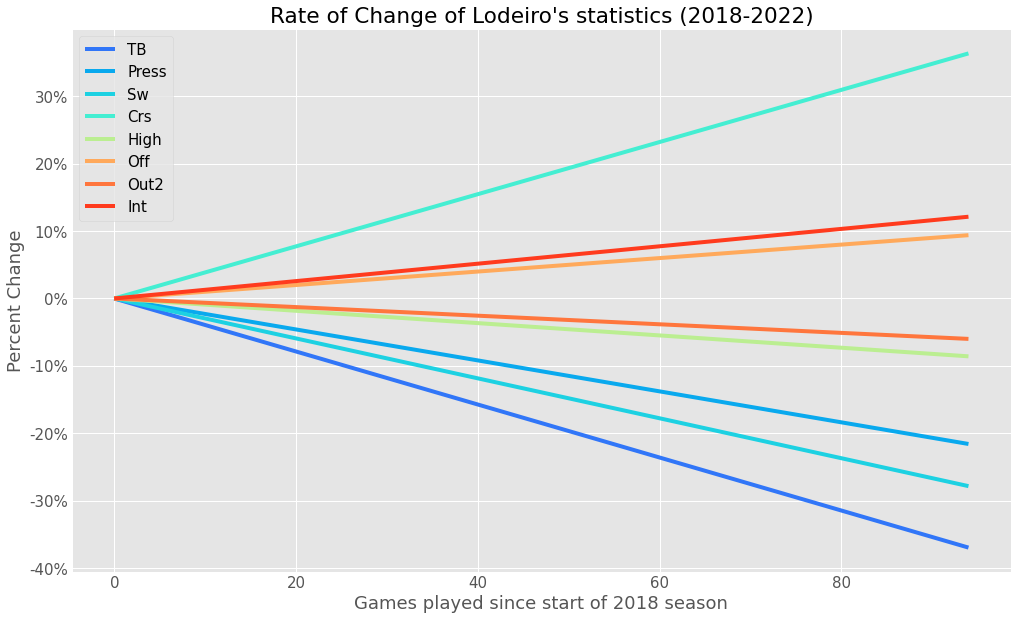

In [123]:
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams.update({'font.size': 15})
#headers = lodeiro.columns
from matplotlib.pyplot import cm
#color = cm.rainbow(np.linspace(0, 1, len(headers)))
headers = ['Att', 'Live', 'TB', 'Press', 'Sw', 'Crs', 'Ground', 'Low', 'High', 'Cmp', 'Off', 'Out2', 'Int', 'Blocks']
color = iter(cm.rainbow(np.linspace(0, 1, len(headers))))
#print(color[1])
for m in range(len(headers)):
    #print(type(lodeiro[headers[a]][1]))
    if isinstance(lodeiro[headers[m]][1], (int, float)):
        #lodeiro.plot.scatter("index", headers[a], label = headers[a])
        a, b = np.polyfit(lodeiro["index"], lodeiro[headers[m]], 1)
        a=a/b
        b = 0
        #a = (b-a*(len(lodeiro["index"]-1)))/b
        #b=0
        #a = (a/lodeiro[headers[m]].mean())
        c= next(color)
        #headers[a]
        if(a<-.0005 or a>.0005): #Need to normalize slopes, try manually calculating somehow
            #lodeiro.plot.scatter("index", headers[m], label = headers[m])
            plt.plot(lodeiro["index"], a*lodeiro["index"]+b, c=c, label= headers[m])
plt.xlabel("Games played since start of 2018 season")
plt.ylabel("Percent Change")
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
plt.title("Rate of Change of Lodeiro's statistics (2018-2022)")
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

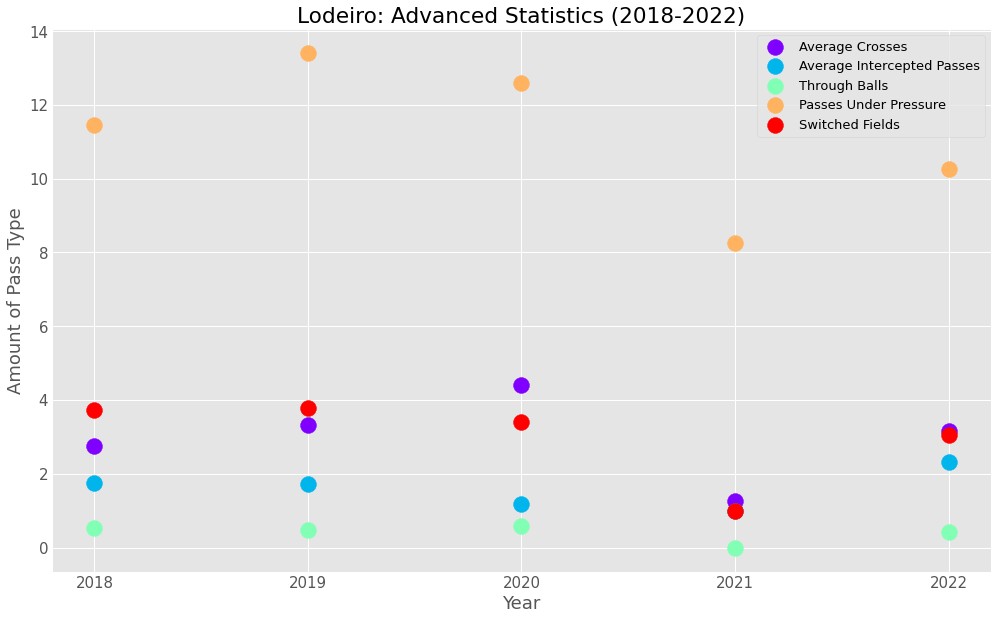

In [119]:
color = iter(cm.rainbow(np.linspace(0, 1, 5)))
c = next(color)
plt.scatter(["2018","2019","2020","2021","2022"],lodeiro.groupby("Year")["Crs"].mean(), s=250, c=c,
            label="Average Crosses")
c=next(color)
plt.scatter(["2018","2019","2020","2021","2022"],lodeiro.groupby("Year")["Int"].mean(), s=250, c=c,
            label="Average Intercepted Passes")
c=next(color)
plt.scatter(["2018","2019","2020","2021","2022"],lodeiro.groupby("Year")["TB"].mean(), s=250,c=c,
            label="Through Balls")
c=next(color)
plt.scatter(["2018","2019","2020","2021","2022"],lodeiro.groupby("Year")["Press"].mean(), s=250,c=c,
            label="Passes Under Pressure")
c=next(color)
plt.scatter(["2018","2019","2020","2021","2022"],lodeiro.groupby("Year")["Sw"].mean(), s=250, c=c,
            label="Switched Fields")
plt.legend(prop={'size': 13})
plt.title("Lodeiro: Advanced Statistics (2018-2022)")
plt.xlabel("Year")
plt.ylabel("Amount of Pass Type")
plt.show()

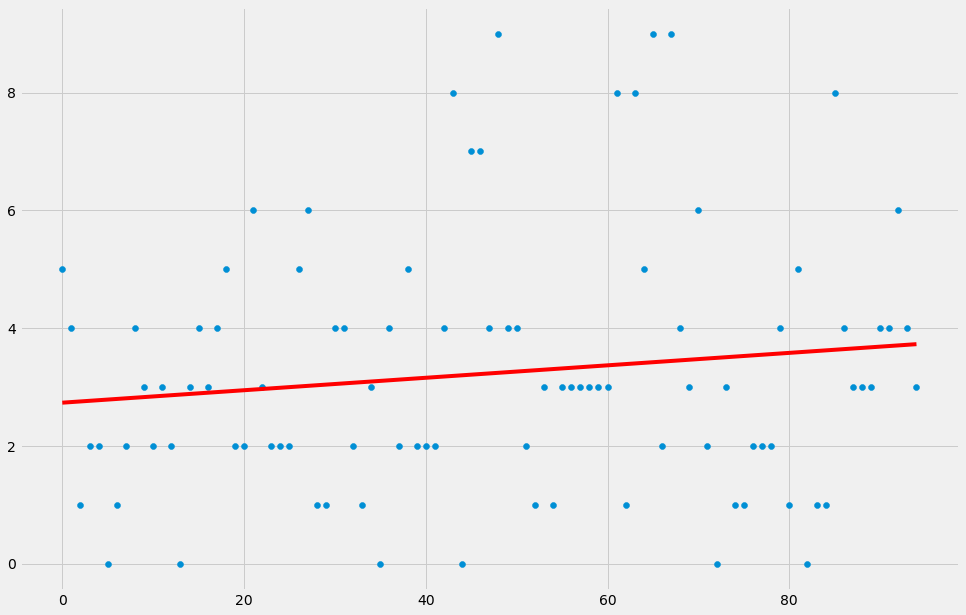

In [90]:
plt.scatter(lodeiro.index, lodeiro.Crs)
a, b = np.polyfit(lodeiro["index"], lodeiro["Crs"], 1)
plt.plot(lodeiro["index"], a*lodeiro["index"]+b, c=c, label= headers[m])